# Table of Contents
by Emily Anderson    

1. [Bayes theorem](#bayes theorem)   
2. [Plotting likelihood function for our failure rate](#likelihood function)     
3. [Beta-prior](#Beta prior)   


<a id='bayes theorem'></a>

# Understanding Bayes     

The Bayes' theorem:

$p(\theta|y)= \frac{\displaystyle p(\theta) p(y|\theta)}{\displaystyle p(y)}$    

where 
$p(y)$ is the probability of the data, in words:    
 
posterior $ = \frac{\displaystyle \textrm{prior} \times  \textrm{likelihood} }{\displaystyle \textrm{marginal likelihood}}$   

since $p(y)$ is a normalizing constant,    

posterior $ \sim \textrm{prior} \times  \textrm{likelihood} $ 

In this notebook we want to visualize how the posterior function changes with the choice of prior, and also how to estimate a likelihood function in a more realistic example.    


With a maximum likelihood problem, we want to estimate a parameter of a distribution.
For the quality control example, we want to estimate the failure probability given the data we were given.
Data provided: f Failures out of N samples

For the quality control example, a binomial distribution seems reasonable. It assumes that the failure rate is constant and that the failures are independent of one another. Later, perhaps we will play with these assumptions

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [2]:
failure_n = 0
sample_n = 30

<a id='likelihood function'></a>    

# Plotting likelihood function for our failure rate, p

Here we will use the binomial distribution for our likelihood function, the probability of having $k$ failures in $n$ events is,     

$P(n,k)= \left( \frac{\displaystyle n}{\displaystyle k} \right) p^{k} (1-p)^{(n-k)}$

where,   
$k =$ number of failures    
$n =$ number of events    
$p =$ probability for an independent failure    



In [3]:
#binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
def get_binomial_likelihood(sample_n,fail_n,res=100):
    #assert type(sample_n) is int, "sample_n is not an integer: %r" % id
    if type(sample_n) != int: raise TypeError('sample_n is not an int')
    if type(fail_n) != int: raise TypeError('fail_n is not an int')
    p_guesses = np.linspace(0,1,res)
    likelihood = []
    for p in p_guesses:
        likelihood.append(stats.binom(sample_n,p).pmf(fail_n))
    return likelihood,p_guesses

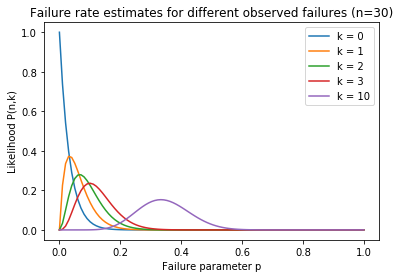

In [4]:
fig,ax = plt.subplots()
fail_rates = [0,1,2,3,10]
for fail_n in fail_rates:
    likelihood,p_guesses = get_binomial_likelihood(sample_n,fail_n)
    plt.plot(p_guesses,likelihood,label='k = '+str(fail_n))

plt.xlabel('Failure parameter p')
plt.ylabel('Likelihood P(n,k)')
plt.title('Failure rate estimates for different observed failures (n=30)')
plt.legend(loc='best')


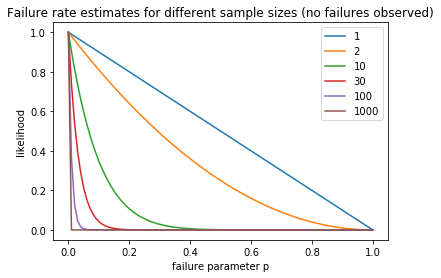

In [5]:
fig,ax = plt.subplots()
sample_sizes = [1,2,10,30,100,1000]
for size in sample_sizes:
    likelihood,p_guesses = get_binomial_likelihood(size,failure_n)
    plt.plot(p_guesses,likelihood,label=str(size))

plt.xlabel('failure parameter p')
plt.ylabel('likelihood')
plt.title('Failure rate estimates for different sample sizes (no failures observed)')
#plt.xscale('log')
plt.legend(loc='best')

The above plots show how the likelihood (binomial distribution) changes with different choices of $n$, $k$ and $p$. 

Note that the two-tailed confidence dashed red lines may not be appropriate for the 0 case, but at worst it is more conservative

<a id='beta prior'></a>
# Beta prior

Update: the Jeffery's prior for a binomial distribution is a beta distribution, perhaps with the parameters 0.5,0.5.

Let's see how the probability function is affected by this choice of prior.


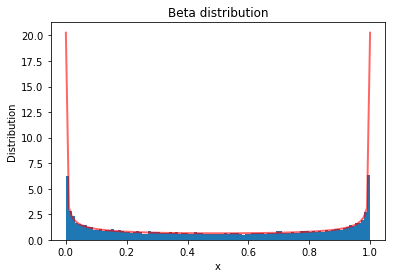

In [6]:
a = 0.5
b= 0.5
fig,ax = plt.subplots()
plt.hist(stats.beta(a,b).rvs(10000),100,normed=True)
x = np.linspace(stats.beta.ppf(0.01, a, b),
                stats.beta.ppf(0.99, a, b), 100)
ax.plot(x, stats.beta.pdf(x, a, b),
        'r-', lw=2, alpha=0.6, label='beta pdf')
plt.title('Beta distribution')
plt.ylabel('Distribution')
plt.xlabel('x')

Now let's plot the prior, likelihood and posterior

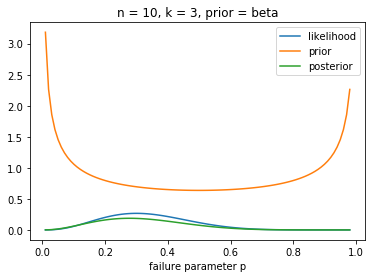

In [7]:
failure_n=3
sample_n=10
likelihood,p_guesses = get_binomial_likelihood(sample_n,failure_n,res=100)
p_guesses = p_guesses[1:98]
likelihood = likelihood[1:98]
prior = stats.beta.pdf(p_guesses,a,b)
posterior = (prior*likelihood)
fig,ax = plt.subplots()
plt.plot(p_guesses,likelihood,label='likelihood')
plt.plot(p_guesses,prior,label='prior')
plt.plot(p_guesses,posterior,label='posterior')
plt.title('n = 10, k = 3, prior = beta')
plt.legend()
plt.xlabel('failure parameter p')